In [1]:
import sys, os
import pandas as pd
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import astropy
import shutil
import pyoperon as Operon
from iminuit import Minuit
from iminuit.cost import LeastSquares
import seaborn as sns

sys.path.append('../')
import mvsr as mvsr
import analysis as ana

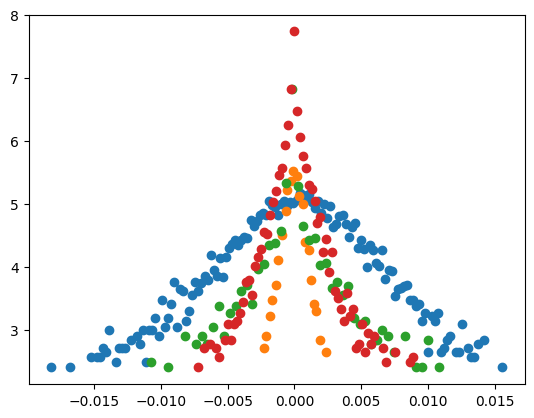

In [12]:
folder = "data_market/examples"

# Delete and recreate folder
if os.path.exists(f"{folder}"):
    shutil.rmtree(f"{folder}")
os.makedirs(f"{folder}")

files = ['CAC40','NASDAQ_AAPL_2010_5m','Bitcoin','Microsoft']

for i in range(len(files)):
    data = pd.read_csv(f"data_market/{files[i]}.csv")
    data['Open'] = data['Open']/data['Open'].max()
    diffs = (np.array(data['Open'][1:]) - np.array(data['Open'][:-1]))
    diffs = diffs[diffs==diffs]
    
    hist, bins = np.histogram(diffs, bins=500);
    x, y = bins[:-1], hist

    mask = y > 10
    x, y = x[mask], y[mask]
    y = np.log(y)

    #mask2 = y!=0
    #x, y = x[mask2], y[mask2]

    plt.scatter(x, y)
    ana.save_2D_example(x, y, f'{folder}/example{i}.csv')

In [13]:
agg_best_str, all_best_str = mvsr.MultiViewSR(folder, maxL=12, maxD=5, generations=1000, seed=20,
                                              OperationSet=Operon.NodeType.Abs|Operon.NodeType.Pow, verbose=False, explicit_params=False)

func, func_str, initial_guess = ana.convert_string_to_func(agg_best_str, 1)
print("f(X1) =", func_str)

f(X1) = -A/Abs(X1)**B + C*Abs(X1)**D


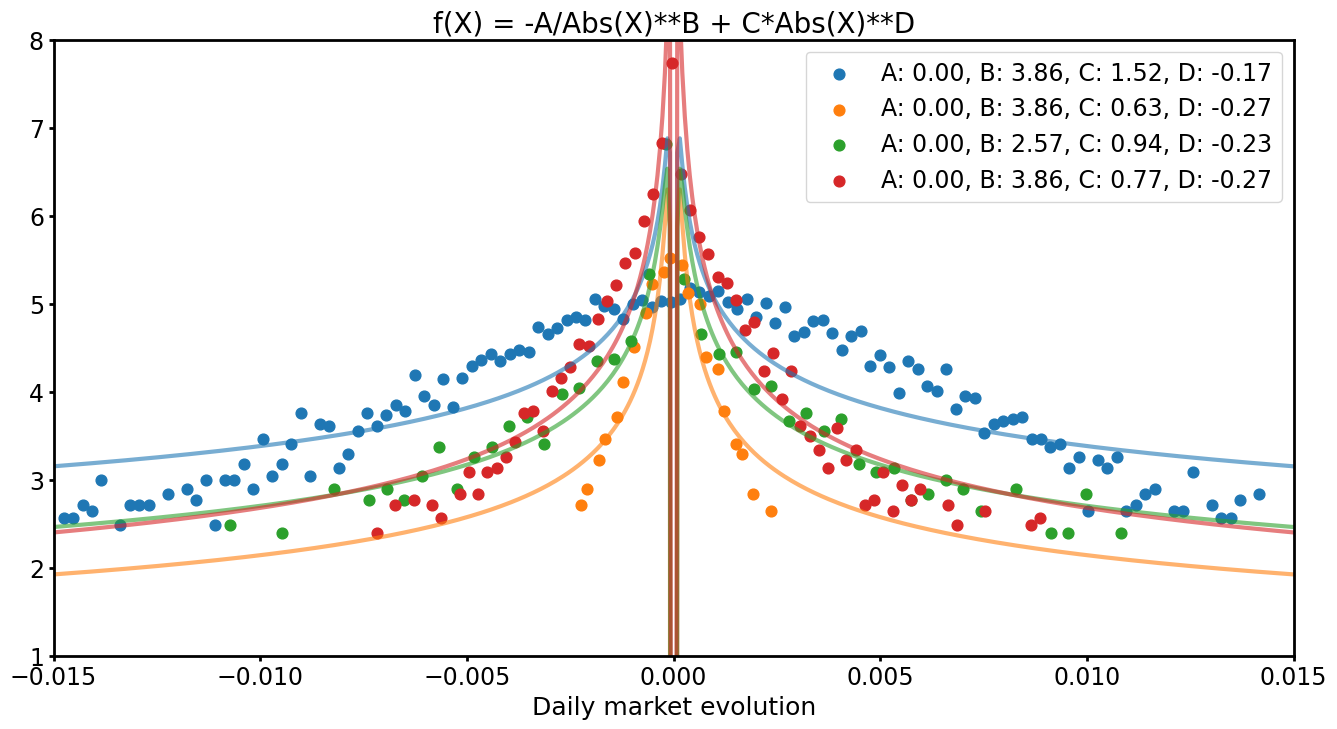

In [14]:
ana.refit_and_plot(folder, func, func_str, initial_guess,
                   [-0.015, 0.015], [1, 8],
                   ['Daily market evolution', ''],
                   folder[:folder.find('/')])

# ______________________________________________________________________________

In [ ]:
folder_test = "data_market/examples_test"

# Delete and recreate folder
if os.path.exists(f"{folder_test}"):
    shutil.rmtree(f"{folder_test}")
os.makedirs(f"{folder_test}")

files = ['CAC40','NASDAQ_AAPL_2010_5m','Bitcoin','Microsoft']#  + ['Nasdaq','Apple']

for i in range(len(files)):
    data = pd.read_csv(f"data_market/{files[i]}.csv")
    data['Open'] = data['Open']/data['Open'].max()
    diffs = (np.array(data['Open'][1:]) - np.array(data['Open'][:-1]))
    diffs = diffs[diffs==diffs]
    
    hist, bins = np.histogram(diffs, bins=500);
    x, y = bins[:-1], hist

    mask = y > 5
    x, y = x[mask], y[mask]
    y = np.log(y)
    ana.save_2D_example(x, y, f'{folder_test}/example{i}.csv')

ana.refit_and_plot(folder_test, func, func_str, initial_guess,
                   [-.015, .015], [-.1, 8],
                   ['Daily market evolution (%)', ''],
                   folder_test[:folder_test.find('/')], limits = [(-1000, 0), (0, 10000), (1, 1)])
